In [ ]:
#incidence_angle,track_angle,los_east,los_north,los_up

import numpy as np
import pandas as pd
from utils import *
asc_df = pd.read_csv("/home/EGMS/data/102_100.csv", nrows = 100)
dsc_df = pd.read_csv("/home/EGMS/data/153_100.csv", nrows = 100)

asc_cols = get_date_columns(asc_df.columns)
dsc_cols = get_date_columns(dsc_df.columns)
matching_dates = match_dates(asc_cols, dsc_cols, 6)

for idx, asc in asc_df.iterrows(): #dla kazdego wiersza w ASC
    dap = []
    dhald = []
    asc_tuple = (asc['latitude'], asc['longitude'])
    nn_idx = nearest_neighbour(asc_tuple, dsc_df[['pid', 'latitude', 'longitude']], 10)
    nn_points = dsc_df.iloc[nn_idx]
    for asc_date in matching_dates: #dla kazdej daty w jednym wierszu ASC
        dsc_dates = matching_dates[asc_date]#POLICZ WZOR
        w = wzor_pierwszy(asc[asc_date], nn_points[dsc_dates].mean(), asc['incidence_angle'], nn_points['incidence_angle'].mean(), asc['track_angle'], nn_points['track_angle'].mean())
        #tutaj zamiast append mean to wzor podstawiamy
        dap.append(w[0])
        dhald.append(w[1])
    break
         
#TODO zrobic w obszaze znalezc wszystkie asc i dsc usrednic do pojedynczyhc wartosci i do wzoru
#TODO wszystkie dscc w promienu do asc



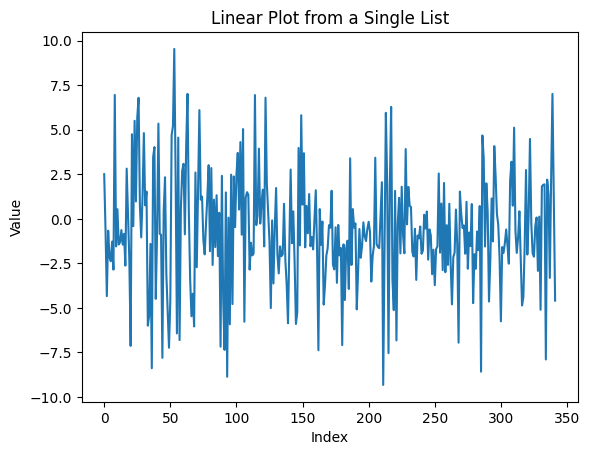

In [5]:
import matplotlib.pyplot as plt

# Create a linear plot
plt.plot(dap)

# Add labels and title (optional)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Linear Plot from a Single List')

# Show the plot
plt.show()


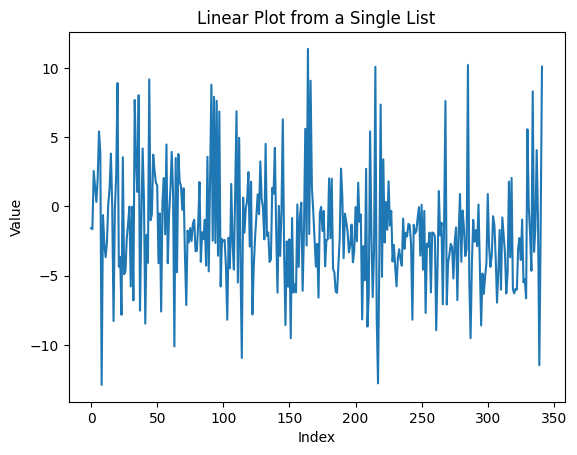

In [6]:
import matplotlib.pyplot as plt

# Create a linear plot
plt.plot(dhald)

# Add labels and title (optional)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Linear Plot from a Single List')

# Show the plot
plt.show()
